# DSCI 235 Project #

Evan Fiechtner - DSCI 235.  
**The data that I am working with is information of the housing price index from the first quarter of 1975 (1975.1) to the last quarter of 2021 (2021.4).  The second dataset I am working with is the average income of all states in the US, in 2020.  The data is from the Federal Reserve Bank of St. Louis, and I used excel to compile all 50 different states into one dataset.**Data from Federal Reserve Bank of St. Louis, using excel to compile all 50 states into one dataset.  
HPI dataframe has 9776 rows, income has 51 rows

**The notebook below contains my questions, the code, and a small reflection/analysis of the question after each code chunk.  There will be a conclusion at the end of the notebook, as well as a summary of the questions that were answered.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') # I added this because at one point it gives me warnings, but the actual code
# functions correctly, so just using this to ignore those warnings to save output space.

## Data sets to read from

In [2]:
hpi = pd.read_csv('https://raw.githubusercontent.com/evan-fiechtner/DSCI235_Final_Project/main/organized_states.csv')
hpi.head()

,state,year,quarter,price
0,AL,1975,1,75.09
1,AL,1975,2,72.29
2,AL,1975,3,74.60
3,AL,1975,4,71.76
4,AL,1976,1,77.17


In [508]:
household_income = pd.read_csv('https://raw.githubusercontent.com/evan-fiechtner/DSCI235_Final_Project/main/dsci_mean_household_income_2021.csv')
household_income.head()

,state,average income
0,AL,69842
1,AK,98606
2,AZ,80779
3,AR,66557
4,CA,106916


In [509]:
hpi_1=hpi.set_index(['state','year', 'quarter'])
hpi_1.head()

price
state year quarter       
AL    1975 1        75.09
           2        72.29
           3        74.60
           4        71.76
      1976 1        77.17

### Merged Dataset with Income and Housing Price Index, on 'state'

In [510]:
income_hpi = hpi.merge(household_income, on='state')
income_hpi.head()

,state,year,quarter,price,average income
0,AL,1975,1,75.09,69842
1,AL,1975,2,72.29,69842
2,AL,1975,3,74.60,69842
3,AL,1975,4,71.76,69842
4,AL,1976,1,77.17,69842


# Part 1: Questions about Housing Price Index (HPI)

**What is the state with the highest starting HPI?**

In [478]:
# highest starting price
year_1975 = hpi[hpi['year'] == 1975]
q1_y75 = year_1975[year_1975['quarter'] == 1]
q1_y75['price'].idxmax()
q1_y75.loc[5452]

state         NH
year        1975
quarter        1
price      78.45
Name: 5452, dtype: object

The state with the highest starting price (i.e. highest price in the first quarter of 1975) is Hew Hampshire, at 78.45.

**What is the state with the lowest starting HPI?**

In [480]:
q1_y75['price'].idxmin()
q1_y75.loc[752]

state         CA
year        1975
quarter        1
price      41.68
Name: 752, dtype: object

The states with the lowest starting HPI is California, at a price index of 41.68.  This was actually a big shock to me.  I would not have thought that California, the largest state in the West Coast, would have been the cheapest state to live in.  California is known for being really pricey overall, so I'm surprised the index was so small in the 70s.

**What is the state with the highest ending HPI?**

In [482]:
# highest ending price
year_2021 = hpi[hpi['year'] == 2021]
q4_y21 = year_2021[year_2021['quarter'] == 4]
q4_y21['price'].idxmax()
q4_y21.loc[3947]

state           MA
year          2021
quarter          4
price      1010.42
Name: 3947, dtype: object

The state with the highest ending price (i.e. the highest price at the end of the dataset, 2021 quarter 4) is Massachusetts, with an ending price index of 1010.42.  This is a little surprising, I originally would've thought that the states would remain the same for the beginning and end, but overall, Massachusetts makes sense, as it's a popular state on the east coast.

**What is the state with the lowest ending HPI?**

In [484]:
q4_y21['price'].idxmin()
q4_y21.loc[9211]

state          WV
year         2021
quarter         4
price      280.26
Name: 9211, dtype: object

West Virginia is the state with the lowest ending HPI, at 280.26.  This wasn't really surprising to me, I knew that WV was having struggles getting people to move there, and actually began incentive programs to get younger adults to live there for a long period of time.

**What is the state with the lowest average HPI**

In [485]:
# lowest average price 
print(hpi.groupby('state')['price'].mean().idxmin())
hpi[hpi['state'] == 'WV']['price'].min()
hpi[hpi['state'] == 'WV']['price'].max()

WV


280.26

The state with the lowest average price, throughout the entire time frame is West Virginia.  The minimum price of West Virginia was in 1975 quarter 1, with a price index of 50.19.  The maximum price of West Virginia is the most recent, 2021 quarter 4, with a price index of 280.26.  
Overall this result is not surprising to me.  As a given, usually HPI continually rises over the years, unless there is a large recession or something like that.  So, given that WV finished at 280.26, which is extremely low compared to other states, it makes sense they'd have the lowest average throughout the data set.

**What is the state with the highest average HPI**

In [375]:
# Highest average price
print(hpi.groupby('state')['price'].mean().idxmax())
hpi[hpi['state'] == 'MA']['price'].min()
hpi[hpi['state'] == 'MA']['price'].max()

MA


1010.42

The state with the highest average price, throughout the entire time frame is Massachusetts.  The minimum price of Massachusetts was in the year 1975, quarter 2, with a price index of 66.01.  This is kind of interesting, because it means that the trend was negative for this first quarter change.  
The maximum price of Massachusetts was in 2021, quarter 4, with a price index of 1010.42.  
This is to be expected.  Although it was not the most expensive in the beginning, a price index of over 1,000 is well over what one would've expected.  Considering this extreme value, and the fact that MA is a popular east coast state, it makes sense that it has the highest average Housing Price Index.

**Top 5 states with the highest average HPI**

In [486]:
# Top 5 states, highest average HPI -- returns sorted list of mean HPI for states
income_hpi.groupby('state')['price'].mean().sort_values()

# top 5 highest states - MA, NY, RI, CA, NJ
MA = income_hpi[income_hpi['state'] == 'MA']
NY = income_hpi[income_hpi['state'] == 'NY']
RI = income_hpi[income_hpi['state'] == 'RI']
CA = income_hpi[income_hpi['state'] == 'CA']
NJ = income_hpi[income_hpi['state'] == 'NJ']

# Top 5 States Differences
MA['first differences'] = MA['price'].diff() # each of these gives warnings, but the actual column is still there
NY['first differences'] = NY['price'].diff() # I imported "to ignore warnings" above, is used here.
RI['first differences'] = RI['price'].diff()
CA['first differences'] = CA['price'].diff()
NJ['first differences'] = NJ['price'].diff()

df1 = pd.merge(MA, NY, how='outer')
df2 = pd.merge(RI, CA, how='outer')
df3 = pd.merge(df1, df2, how='outer')
top_5 = pd.merge(df3, NJ, how='outer')
plot_t5 = top_5.groupby('state')['price'].mean().sort_values()
plot_t5

state
NJ    317.394255
CA    318.052819
RI    326.165372
NY    382.507340
MA    427.165691
Name: price, dtype: float64

This result was a little surprising to me.  I would not have expected that New Jersey was such an expensive state to live in.  California was expected, but I am surprised that overall, most of the most expensive states to live in are on the East Coast.  Since these are averaged over 1975-2021, I would guess that it means that NJ and RI have just continuously held a higher average throughout the years, as opposed to say Hawaii, who might have been cheaper in the beginning, and more expensive now.

**Plot the 5 highest housing price indices**

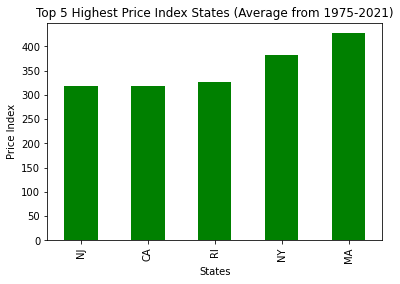

In [487]:
# plot of 5 highest housing indices
plot_t5.plot(x ='state', y='price', kind = 'bar', color='g')
plt.xlabel('States')
plt.ylabel('Price Index')
plt.title('Top 5 Highest Price Index States (Average from 1975-2021)')
plt.show()

*Notice how on the graph here, the y-axis has unites from 0-450, while on the other graph its from 0-175*

**Top 5 States with the LOWEST average HPI**

In [488]:
# Same as above, this time looking at the lowest state averages
income_hpi.groupby('state')['price'].mean().sort_values()

# top 5 lowest states - WV, OK, KS, LA, TX
WV = income_hpi[income_hpi['state'] == 'WV']
OK = income_hpi[income_hpi['state'] == 'OK']
KS = income_hpi[income_hpi['state'] == 'KS']
LA = income_hpi[income_hpi['state'] == 'LA']
TX = income_hpi[income_hpi['state'] == 'TX']
# Bottom 5 States Differences
WV['first differences'] = WV['price'].diff() # gives warnings, but adds the columns sufficiently
OK['first differences'] = OK['price'].diff()
KS['first differences'] = KS['price'].diff()
LA['first differences'] = LA['price'].diff()
TX['first differences'] = TX['price'].diff()
df4 = pd.merge(WV, OK, how='outer')
df5 = pd.merge(KS, LA, how='outer')
df6 = pd.merge(df4, df5, how='outer')
bottom_5 = pd.merge(df6, TX, how='outer')
bottom_5.groupby('state')['price'].mean().sort_values()

state
WV    151.419681
OK    153.250904
LA    170.286968
KS    175.198883
TX    176.229787
Name: price, dtype: float64

Honestly, this is pretty close to what I expected.  WV was the cheapest state to live in on average, and the cheapest ending HPI price, so this result makes sense.  Texas is well known for being cheap and all these states are in general around the same area (Southern US), with West Virginia being the only exception.  Even then, we knew that WV was the cheapest state on the East Coast and in general.

**Plot of 5 lowest housing price indices**

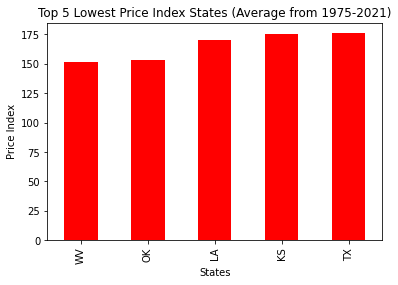

In [489]:
# plot of bottom 5 housing price indices
plot_b5 = bottom_5.groupby('state')['price'].mean().sort_values()
plot_b5.plot(x ='state', y='price', kind = 'bar', color='r')
plt.xlabel('States')
plt.ylabel('Price Index')
plt.title('Top 5 Lowest Price Index States (Average from 1975-2021)')
plt.show()

*Notice how on the graph here, the y-axis is from 0-175, while on the first graph it is from 0-450*

**Plot the first differences for the highest 5 states**

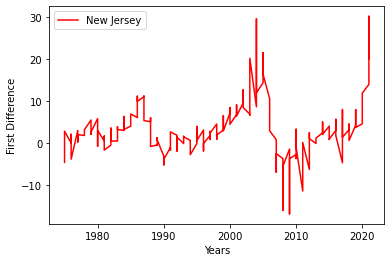

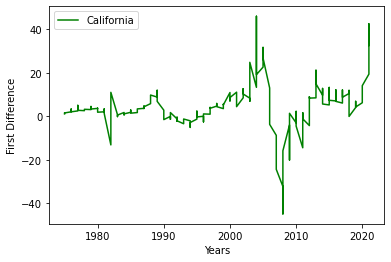

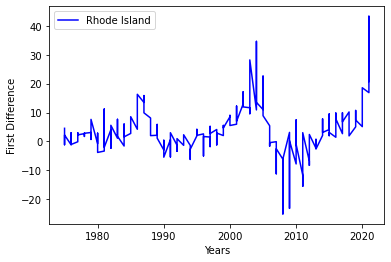

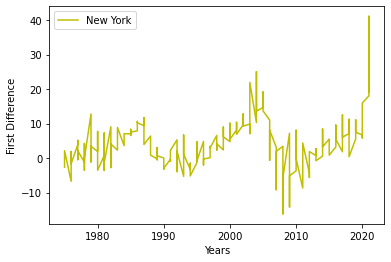

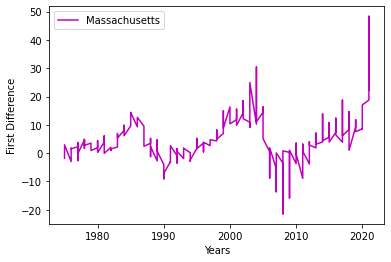

In [490]:
# plot of first differences for top 5 states

# New Jersey
NJ.plot(x='year', y='first differences', label = "New Jersey", color='r')
plt.xlabel('Years')
plt.ylabel('First Difference')

# California
CA.plot(x='year', y='first differences', label = "California", color='g')
plt.xlabel('Years')
plt.ylabel('First Difference')

# Rhode Island
RI.plot(x='year', y='first differences', label = "Rhode Island", color='b')
plt.xlabel('Years')
plt.ylabel('First Difference')

# New York
NY.plot(x='year', y='first differences', label = "New York", color='y')
plt.xlabel('Years')
plt.ylabel('First Difference')

# Massachusetts
MA.plot(x='year', y='first differences', label = "Massachusetts", color='m')
plt.xlabel('Years')
plt.ylabel('First Difference')
plt.show()

This is an interesting plot to use.  Using the first differences of these variables instead of the general variables shows us how big of a difference from the first observation each next observation is.  In this case, the graphs actually look fairly similar, with a period of large growth in the early 2000s (prior to Great Recession in 2006-2009).  Then, there is an extreme drop in the differences, which gradually rises up again until COVID starts.  When COVID starts, you can see that every single graph shoots up in terms of the differences.  This is not an error, it just goes to show how drastically prices have been changing since COVID started.  There are thousands of instances of houses selling for over the original list price, with the most drastic being 47% over list price (A house from Brooklyn sold for over $100k more than asking).  
Aside from the general trends, California experienced the largest growth and the largest deprecation, all within the time period of 2000-2007. If you pay attention to the units on the y-axis, you'll see that New Jersey has the smallest variation in growth, with a graph from -10 to 30, while California has the largest, ranging from -40 to 40.  MA is a close second, at -20 to 50.

**Plot the first differences for the lowest 5 states**

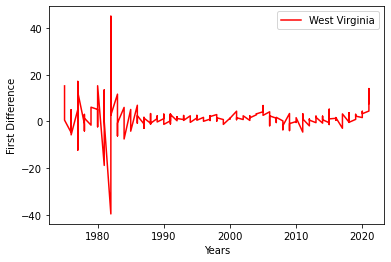

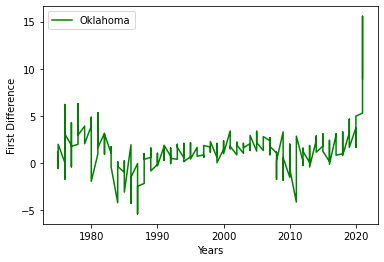

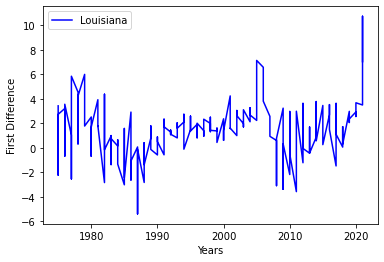

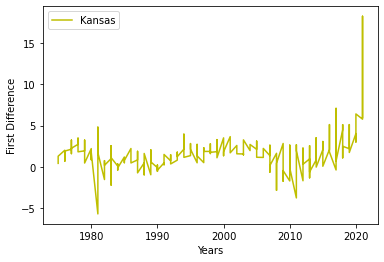

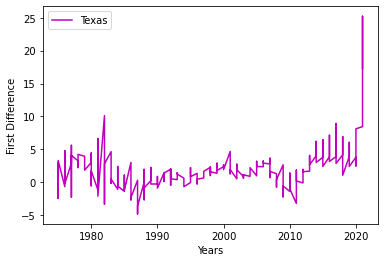

In [463]:
# plot of first differences for lowest 5 states
# West Virginia
WV.plot(x='year', y='first differences', label = "West Virginia", color='r')
plt.xlabel('Years')
plt.ylabel('First Difference')

# Oklahoma
OK.plot(x='year', y='first differences', label = "Oklahoma", color='g')
plt.xlabel('Years')
plt.ylabel('First Difference')

# Louisiana
LA.plot(x='year', y='first differences', label = "Louisiana", color='b')
plt.xlabel('Years')
plt.ylabel('First Difference')

# Kansas
KS.plot(x='year', y='first differences', label = "Kansas", color='y')
plt.xlabel('Years')
plt.ylabel('First Difference')

# Texas
TX.plot(x='year', y='first differences', label = "Texas", color='m')
plt.xlabel('Years')
plt.ylabel('First Difference')
plt.show()

It's interesting to see the differences between the top 5 highest HPI states, and the top 5 lowest HPI states.  In general, the first differences plots are much more mild in these lowest states compared to the highest.  Aside from West Virginia, every state for the most part follows a similar trend.  They all have larger variation in the 70s-90s, then it calms down.  These states weren't affected by the Great Recession nearly as much as the top 5 highest states, their first differences didn't really change from 2006-2010, but they did experience extremely large growth right at the end (again, when COVID started).  
Another interesting part of these plots is how different West Virginia is from the other states.  For some reason, West Virginia has a large growth period in the 80s, then is very calm aside from that.  Even in COVID, when every other state has a skyrocket in HPI, West Virginia is fairly docile.

**Question: What are the 5 states that are closest to the average US HPI?**

In [492]:
# top 5 states closest to average US housing price index.
df7 = hpi.groupby('state')['price'].mean().sort_values().to_frame().reset_index() # returning average, sorted, in a df
df7[df7['state'] == 'US'] # so US housing price index overall is 240.156
# The closest 5 to the US price index are: Illinois, South Carolina, Montana, Utah, Florida, (US here)
df7.loc[28:33]

,state,price
28,IL,227.882234
29,SC,230.128191
30,MT,238.712926
31,UT,239.221968
32,FL,240.006064
33,US,240.156755


These are the closest states, with US in the middle.  The US average is 240.16, and all these are within 5-13 points (These are all lower than the US, but the next closest above the US was Pennsylvanie, 15 points higher).

# Part Two - A Few Income Questions

**Question: What states have the highest and lowest average incomes in the US?**

In [493]:
# income compared to current housing price (2021)
# build a new data set for this.
household_income['average income'].idxmax()
print(household_income.loc[29])
# new jersey has the highest average household income in the United States, at $114,691.

household_income['average income'].idxmin()
print(household_income.loc[23])
# Mississippi has the lowest average household income in the US, at $62,835.

state                 NJ
average income    114691
Name: 29, dtype: object
state                MS
average income    62835
Name: 23, dtype: object


New Jersey makes sense as having the highest average income in the US.  Given that New Jersy is one of the most expensive states to live in, an accompanying high household income is expected.  As for the lowest, I am slightly surprised that Mississippi is the state that has the lowest, but it still makes sense.  Mississippi is the seventh lowest average HPI state in the US, so it being the lowest income matches its level fairly closely.

**Question: Make a column with the percent of income compared to Housing Price Index, for each state**

In [496]:
income_hpi['Income Percent of HPI'] = (income_hpi['average income'] / income_hpi['price'])/10

In [498]:
income_hpi

,state,year,quarter,price,average income,Income Percent of HPI
0,AL,1975,1,75.09,69842,93.011053
1,AL,1975,2,72.29,69842,96.613640
2,AL,1975,3,74.60,69842,93.621984
3,AL,1975,4,71.76,69842,97.327202
4,AL,1976,1,77.17,69842,90.504082
...,...,...,...,...,...,...
9771,US,2020,4,473.21,84854,17.931574
9772,US,2021,1,484.35,84854,17.519149
9773,US,2021,2,511.06,84854,16.603530
9774,US,2021,3,539.58,84854,15.725935


I think these results are interesting because it can show you just how fast the housing price index changes compared to income.  A good example of this is the tail of the prior code, which shows that in just 1 year (2020.4 to 2021.4) income changed from 17.93% to 15.21% of HPI.  It just goes to show how drastic and fast these changes are taking place.

**Plot the top 5 highest HPI States' Incomes**

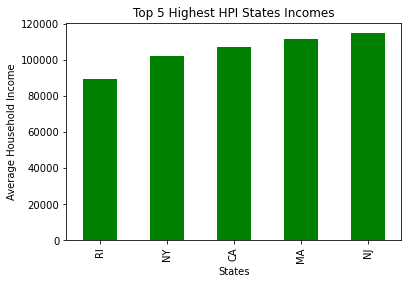

In [418]:
# Plot the top 5 highest HPI states incomes
income_t5 = top_5.groupby('state')['average income'].mean().sort_values()
income_t5.plot(x ='state', y='average income', kind = 'bar', color='g')
plt.xlabel('States')
plt.ylabel('Average Household Income')
plt.title('Top 5 Highest HPI States Incomes')
plt.show()

*Note the axis on this graph, goes from 0 to 120,000, while the lowest Income States goes from 0-80,000.*

**Plot the top 5 lowest HPI States Incomes**

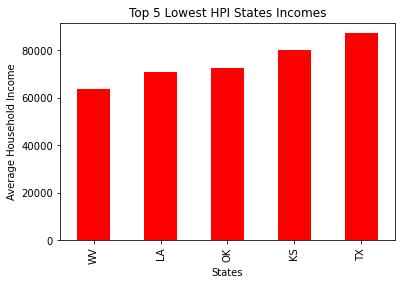

In [419]:
# Plot the top 5 lowest HPI states income
income_b5 = bottom_5.groupby('state')['average income'].mean().sort_values()
income_b5.plot(x ='state', y='average income', kind = 'bar', color='r')
plt.xlabel('States')
plt.ylabel('Average Household Income')
plt.title('Top 5 Lowest HPI States Incomes')
plt.show()

*Again, this graph is only up to 80,000, while the other reaches 120,000*

**What are the 5 closest states to US Income?**

In [501]:
# What are the 5 closest states to US income?
close_to_us = income_hpi.groupby('state')['average income'].mean().sort_values().to_frame().reset_index()
close_to_us.loc[29:33]

,state,average income
29,OR,84258.0
30,PA,84849.0
31,US,84854.0
32,ND,85476.0
33,TX,87260.0


This shows that the closest to the overall average income in the United States are Oregon, Pennsylvania, North Dakota, and Texas.  The US average is 84,854, and these vary by 5 dollars to 2676 dollars.

## Overall Conclusion

Overall, this was a fun project to work on.  It was interesting to see the different states that were the most expensive versus least expensive, those that had the highest and lowest income, and those that were closest to the overall average of the US.  I think the most shocking information came from the differences in the plots of first differences between the top 5 highest HPI states, and the top 5 lowest HPI states.  The graphs in their respective groups were nearly the exact same, with West Virginia being an outlier, but seeing that the Great Recession didn't really effect the lower HPI states compared to the higher HPI states was interesting.  
I was not surprised to see that the largest period of growth for most states was in the early 2000s, as there were ARMs (Adjustable-rate mortgages).  These stimulated the growth of the housing market in the early 2000s, but were only available for a few yers, and once they expired, people were forced to give much higher mortgage payments, in large part causing the massive collapse of the economy.  So this extremely fluctuating time of growth and deprecation makes sense.  Seeing as how in West Virginia the main period of growth was in the 1980s, it makes me curious as to what might have happened specifically in that state's housing market at that time.  Even in times of COVID, where everything is being upsold above asking price, WV still didn't experience it's highest growth.  
Anyways, this is the conclusion of my project, I think that this shows some of the interesting parts of the housing market, as well as shows just how far housing prices have risen since the 70s.  
**I worked on this project by myself, so I am responsible for all parts, no team members.**

## Summary of Questions Answered

Questions Answered:
* Merge the datasets for income and HPI together
* Which state starts with the highest HPI
* Which state starts with the lowest HPI
* Which state ends with the highest HPI
* Which state ends with the lowest HPI

* Which state has the lowest AVERAGE HPI
* Which state has the highest AVERAGE HPI

* Top 5 states with the highest avg HPI
* Plot of the top 5 states with the highest avg HPI
  
* Top 5 states with the LOWEST avg HPI
* Plot of the top 5 states with the lowest avg HPI

* Plot of top 5 states highest HPI first differences
* Plot of top 5 states LOWEST HPI first differences
* What are the 5 states closest to the US average HPI

* Which states have the highest and lowest average income?
* Make a column showing the percentage of income to HPI for each state

* Plot the top 5 highest HPI states incomes
* Plot the top 5 lowest HPI states incomes
* What are the 5 states closest to the US Average Income?